Pipeline to Get 1D Spectra from Raw Data (IRD Stream)
=====================================================

This tutorial demonstrates how to reduce raw data to wavelength-calibrated 1D spectra. 
By using the `Stream2D` framework, you can apply functions to multiple FITS files efficiently.

- :ref:`step0`
- :ref:`step1`
    - :ref:`step1-1`
    - :ref:`step1-2` 
    - :ref:`step1-3`
    - :ref:`step1-4`
- :ref:`step2`
    - :ref:`step2-1`
    - :ref:`step2-2`
    - :ref:`step2-3`
    - :ref:`step2-4`
    - :ref:`step2-5`

.. _step0: 

## Step 0: Settings
### Directory Structure

First, create a `datadir` for the raw data and `anadir` for storing the output.

This tutorial assumes the following directory structure:
```
.
└── pyird/
    └── data/
        └── 20210317/
            ├── flat
            ├── thar
            ├── target
            ├── dark
            └── reduc
```
In this structure, the flat, thar, target, and dark directories are part of the `datadir`, each containing raw data for 'Flat', 'ThAr', 'Target', and optionally 'Dark' frames. 
The reduc directory is used as `anadir` for storing processed data.

In [1]:
import pathlib
basedir = pathlib.Path('~/pyird/data/20210317/').expanduser()

datadir_flat = basedir/'flat/'
datadir_dark = basedir/'dark/'
datadir_thar = basedir/'thar'
datadir_target = basedir/'target/'
anadir = basedir/'reduc/'

### Specify the Data to be Analyzed

Please change the following variables based on the data you want to analyze.

In [2]:
band = 'h' #'h' or 'y'
mmf = 'mmf2' #'mmf1' (comb fiber) or 'mmf2' (star fiber)
readout_noise_mode = 'default'

# file numbers of fits files (last five digits)
fitsid_flat_comb = list(range(41704,41804,2)) 
fitsid_flat_star = list(range(41804,41904,2)) 
fitsid_dark = [41504]
fitsid_thar = list(range(14632,14732))
fitsid_target = [41510]

**Note**:

Ensure that the `readout_noise_mode` is set to either 'real' or 'default'.

- `readout_noise_mode = 'real'`: Need to reduce the dataset with `band = 'y'` and `mmf = 'mmf1'` at first.
    - With this setting, uncertainties and signal-to-noise ratio at each wavelength will be included in the output files (**nw..._m?.dat** and **ncw..._m?.dat**).
    - Those values are based on the readout noise (RN) calculated using the comb spectrum (in mmf1) of the Y/J band.

- `readout_noise_mode = 'default'`: Uses a default readout noise (RN) value (RN=12 $e^{-}$).

.. _step1:

## Step 1: Preprocessing the Calibration Dataset

<img src="../figures/reduc_flowchart_calib.png" width=80%>

.. _step1-1:

### Step 1-1: Identifying Apertures

- The `aptrace` function is used to identify apertures.
- Number of apertures (`nap`): 42 for H band, 102 for Y/J band.
- These apertures are identified in the FLAT_COMB data.
- If your observation was performed with a single fiber, set `nap` to half the default value.

No fitsid yet.
median combine:  


  0%|                                                                                                                          | 0/50 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 660.82it/s]

default nap value
cross-section: row  1201


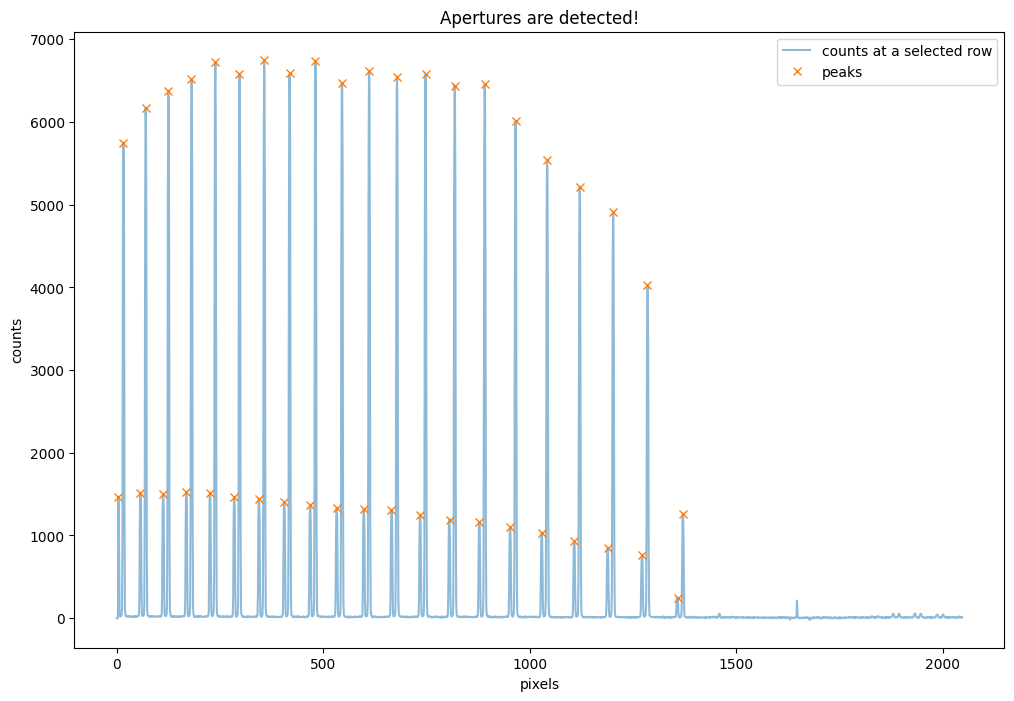

  0%|                                                                                                                          | 0/42 [00:00<?, ?it/s]

  2%|██▋                                                                                                               | 1/42 [00:00<00:11,  3.45it/s]

  5%|█████▍                                                                                                            | 2/42 [00:00<00:09,  4.23it/s]

  7%|████████▏                                                                                                         | 3/42 [00:00<00:08,  4.48it/s]

 10%|██████████▊                                                                                                       | 4/42 [00:00<00:08,  4.68it/s]

 12%|█████████████▌                                                                                                    | 5/42 [00:01<00:07,  4.69it/s]

 14%|████████████████▎                                                                                                 | 6/42 [00:01<00:08,  4.44it/s]

 17%|███████████████████                                                                                               | 7/42 [00:01<00:07,  4.50it/s]

 19%|█████████████████████▋                                                                                            | 8/42 [00:01<00:07,  4.59it/s]

 21%|████████████████████████▍                                                                                         | 9/42 [00:01<00:07,  4.70it/s]

 24%|██████████████████████████▉                                                                                      | 10/42 [00:02<00:06,  4.73it/s]

 26%|█████████████████████████████▌                                                                                   | 11/42 [00:02<00:06,  4.77it/s]

 29%|████████████████████████████████▎                                                                                | 12/42 [00:02<00:06,  4.79it/s]

 31%|██████████████████████████████████▉                                                                              | 13/42 [00:02<00:06,  4.80it/s]

 33%|█████████████████████████████████████▋                                                                           | 14/42 [00:03<00:05,  4.85it/s]

 36%|████████████████████████████████████████▎                                                                        | 15/42 [00:03<00:05,  4.82it/s]

 38%|███████████████████████████████████████████                                                                      | 16/42 [00:03<00:05,  4.77it/s]

 40%|█████████████████████████████████████████████▋                                                                   | 17/42 [00:03<00:05,  4.84it/s]

 43%|████████████████████████████████████████████████▍                                                                | 18/42 [00:03<00:04,  4.80it/s]

 45%|███████████████████████████████████████████████████                                                              | 19/42 [00:04<00:04,  4.85it/s]

 48%|█████████████████████████████████████████████████████▊                                                           | 20/42 [00:04<00:04,  4.89it/s]

 50%|████████████████████████████████████████████████████████▌                                                        | 21/42 [00:04<00:04,  4.93it/s]

 52%|███████████████████████████████████████████████████████████▏                                                     | 22/42 [00:04<00:04,  4.94it/s]

 55%|█████████████████████████████████████████████████████████████▉                                                   | 23/42 [00:04<00:03,  4.97it/s]

 57%|████████████████████████████████████████████████████████████████▌                                                | 24/42 [00:05<00:03,  4.99it/s]

 60%|███████████████████████████████████████████████████████████████████▎                                             | 25/42 [00:05<00:03,  4.95it/s]

 62%|█████████████████████████████████████████████████████████████████████▉                                           | 26/42 [00:05<00:03,  4.96it/s]

 64%|████████████████████████████████████████████████████████████████████████▋                                        | 27/42 [00:05<00:03,  4.96it/s]

 67%|███████████████████████████████████████████████████████████████████████████▎                                     | 28/42 [00:05<00:02,  5.01it/s]

 69%|██████████████████████████████████████████████████████████████████████████████                                   | 29/42 [00:06<00:02,  4.96it/s]

 71%|████████████████████████████████████████████████████████████████████████████████▋                                | 30/42 [00:06<00:02,  4.92it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████▍                             | 31/42 [00:06<00:02,  4.86it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████                           | 32/42 [00:06<00:02,  4.88it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████▊                        | 33/42 [00:06<00:01,  4.92it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████▍                     | 34/42 [00:07<00:01,  4.93it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████▏                  | 35/42 [00:07<00:01,  4.93it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████▊                | 36/42 [00:07<00:01,  4.41it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▌             | 37/42 [00:07<00:01,  4.47it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 38/42 [00:07<00:00,  4.53it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 39/42 [00:08<00:00,  4.55it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 40/42 [00:08<00:00,  4.68it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 41/42 [00:08<00:00,  4.47it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.59it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.74it/s]

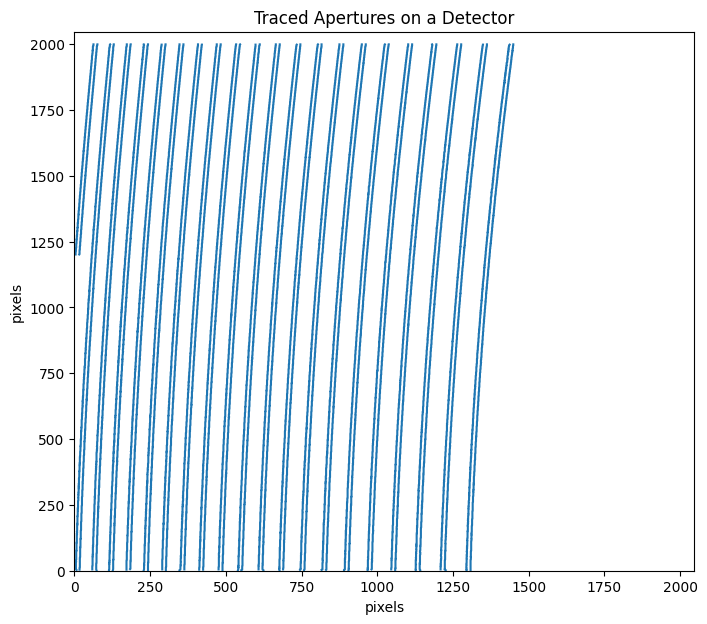

In [3]:
from pyird.utils import irdstream

## FLAT_COMB
# settings
flat_comb = irdstream.Stream2D("flat_comb",datadir_flat,anadir)
flat_comb.fitsid = fitsid_flat_comb

flat_comb.band = band

# aperture extraction
if band=='h' and flat_comb.fitsid[0]%2==0:
    flat_comb.fitsid_increment() 
    trace_mmf=flat_comb.aptrace(cutrow = 1200,nap=42) 
elif band=='y':
    trace_mmf=flat_comb.aptrace(cutrow = 1000,nap=102) 

- Define 'trace_mask' to mask light from both fibers.
- Aperture width is 6 pixels (from -2 to +4) for IRD data and 5 pixels (from -2 to 3) for REACH data by default. You can change it `.width` instance of trace_mmf.

In [4]:
trace_mask = trace_mmf.mask()

  0%|                                                                                                                          | 0/42 [00:00<?, ?it/s]

 26%|█████████████████████████████▎                                                                                  | 11/42 [00:00<00:00, 100.02it/s]

 52%|███████████████████████████████████████████████████████████▏                                                     | 22/42 [00:00<00:00, 94.63it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████                           | 32/42 [00:00<00:00, 92.65it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 91.54it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 92.66it/s]

- Reduce apertures in the mask to extract the spectrum from the desired fiber

In [5]:
if mmf=='mmf2':
    trace_mmf.choose_mmf2_aperture() #mmf2 (star fiber)
elif mmf=='mmf1':
    trace_mmf.choose_mmf1_aperture() #mmf1 (comb fiber)

.. _step1-2:

### Step 1-2: Removing hotpixels

- There are two options for creating the hotpixel mask.
- This tutorial introduces one method using dark data.
- Refer to `pyird.io.read_hotpix <https://secondearths.sakura.ne.jp/pyird/pyird/pyird.io.html#module-pyird.io.read_hotpix>`_ module for an alternative approach without dark data.

In [6]:
from pyird.image.bias import bias_subtract_image
from pyird.image.hotpix import identify_hotpix_sigclip

## HOTPIXEL MASK: 
## DARK
dark = irdstream.Stream2D('dark', datadir_dark, anadir,fitsid=fitsid_dark) # Multiple file is ok
if band=='h' and dark.fitsid[0]%2==0:
    dark.fitsid_increment() 
median_image = dark.immedian()
im_subbias = bias_subtract_image(median_image)
hotpix_mask = identify_hotpix_sigclip(im_subbias)

fitsid: [41504]
median combine:  


  0%|                                                                                                                           | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 88.39it/s]

hotpix mask = 0.58 percent


.. _step1-3:

### Step 1-3: Wavelength Calibration


- Wavelength calibration is performed by using reference frames (Thrium-Argon).
- You do not need to manually identify emission lines; ``calibrate_wavelength`` automatically references the line list!

fitsid: [14632, 14633, 14634, 14635, 14636, 14637, 14638, 14639, 14640, 14641, 14642, 14643, 14644, 14645, 14646, 14647, 14648, 14649, 14650, 14651, 14652, 14653, 14654, 14655, 14656, 14657, 14658, 14659, 14660, 14661, 14662, 14663, 14664, 14665, 14666, 14667, 14668, 14669, 14670, 14671, 14672, 14673, 14674, 14675, 14676, 14677, 14678, 14679, 14680, 14681, 14682, 14683, 14684, 14685, 14686, 14687, 14688, 14689, 14690, 14691, 14692, 14693, 14694, 14695, 14696, 14697, 14698, 14699, 14700, 14701, 14702, 14703, 14704, 14705, 14706, 14707, 14708, 14709, 14710, 14711, 14712, 14713, 14714, 14715, 14716, 14717, 14718, 14719, 14720, 14721, 14722, 14723, 14724, 14725, 14726, 14727, 14728, 14729, 14730, 14731]
clean_pattern: output extension=_cp


  0%|                                                                                                                         | 0/100 [00:00<?, ?it/s]

  1%|█▏                                                                                                               | 1/100 [00:01<01:43,  1.05s/it]

  2%|██▎                                                                                                              | 2/100 [00:02<01:37,  1.00it/s]

  3%|███▍                                                                                                             | 3/100 [00:02<01:31,  1.07it/s]

  4%|████▌                                                                                                            | 4/100 [00:04<01:39,  1.03s/it]

  5%|█████▋                                                                                                           | 5/100 [00:05<01:43,  1.09s/it]

  6%|██████▊                                                                                                          | 6/100 [00:06<01:46,  1.13s/it]

  7%|███████▉                                                                                                         | 7/100 [00:07<01:45,  1.14s/it]

  8%|█████████                                                                                                        | 8/100 [00:08<01:47,  1.17s/it]

  9%|██████████▏                                                                                                      | 9/100 [00:09<01:40,  1.11s/it]

 10%|███████████▏                                                                                                    | 10/100 [00:10<01:35,  1.06s/it]

 11%|████████████▎                                                                                                   | 11/100 [00:11<01:31,  1.03s/it]

 12%|█████████████▍                                                                                                  | 12/100 [00:12<01:35,  1.08s/it]

 13%|██████████████▌                                                                                                 | 13/100 [00:14<01:35,  1.10s/it]

 14%|███████████████▋                                                                                                | 14/100 [00:15<01:36,  1.12s/it]

 15%|████████████████▊                                                                                               | 15/100 [00:16<01:37,  1.15s/it]

 16%|█████████████████▉                                                                                              | 16/100 [00:17<01:30,  1.08s/it]

 17%|███████████████████                                                                                             | 17/100 [00:18<01:25,  1.03s/it]

 18%|████████████████████▏                                                                                           | 18/100 [00:19<01:26,  1.06s/it]

 19%|█████████████████████▎                                                                                          | 19/100 [00:20<01:22,  1.02s/it]

 20%|██████████████████████▍                                                                                         | 20/100 [00:21<01:25,  1.07s/it]

 21%|███████████████████████▌                                                                                        | 21/100 [00:22<01:25,  1.08s/it]

 22%|████████████████████████▋                                                                                       | 22/100 [00:23<01:26,  1.11s/it]

 23%|█████████████████████████▊                                                                                      | 23/100 [00:25<01:29,  1.17s/it]

 24%|██████████████████████████▉                                                                                     | 24/100 [00:26<01:24,  1.11s/it]

 25%|████████████████████████████                                                                                    | 25/100 [00:27<01:19,  1.07s/it]

 26%|█████████████████████████████                                                                                   | 26/100 [00:28<01:17,  1.05s/it]

 27%|██████████████████████████████▏                                                                                 | 27/100 [00:29<01:21,  1.11s/it]

 28%|███████████████████████████████▎                                                                                | 28/100 [00:30<01:22,  1.14s/it]

 29%|████████████████████████████████▍                                                                               | 29/100 [00:31<01:22,  1.16s/it]

 30%|█████████████████████████████████▌                                                                              | 30/100 [00:33<01:33,  1.33s/it]

 31%|██████████████████████████████████▋                                                                             | 31/100 [00:34<01:26,  1.25s/it]

 32%|███████████████████████████████████▊                                                                            | 32/100 [00:35<01:19,  1.17s/it]

 33%|████████████████████████████████████▉                                                                           | 33/100 [00:36<01:21,  1.22s/it]

 34%|██████████████████████████████████████                                                                          | 34/100 [00:38<01:20,  1.22s/it]

 35%|███████████████████████████████████████▏                                                                        | 35/100 [00:39<01:28,  1.35s/it]

 36%|████████████████████████████████████████▎                                                                       | 36/100 [00:40<01:24,  1.32s/it]

 37%|█████████████████████████████████████████▍                                                                      | 37/100 [00:42<01:21,  1.29s/it]

 38%|██████████████████████████████████████████▌                                                                     | 38/100 [00:43<01:12,  1.16s/it]

 39%|███████████████████████████████████████████▋                                                                    | 39/100 [00:44<01:07,  1.10s/it]

 40%|████████████████████████████████████████████▊                                                                   | 40/100 [00:44<01:02,  1.05s/it]

 41%|█████████████████████████████████████████████▉                                                                  | 41/100 [00:45<01:00,  1.02s/it]

 42%|███████████████████████████████████████████████                                                                 | 42/100 [00:47<01:02,  1.07s/it]

 43%|████████████████████████████████████████████████▏                                                               | 43/100 [00:48<01:02,  1.09s/it]

 44%|█████████████████████████████████████████████████▎                                                              | 44/100 [00:49<01:01,  1.10s/it]

 45%|██████████████████████████████████████████████████▍                                                             | 45/100 [00:50<01:01,  1.12s/it]

 46%|███████████████████████████████████████████████████▌                                                            | 46/100 [00:51<00:57,  1.06s/it]

 47%|████████████████████████████████████████████████████▋                                                           | 47/100 [00:52<00:53,  1.01s/it]

 48%|█████████████████████████████████████████████████████▊                                                          | 48/100 [00:53<00:52,  1.01s/it]

 49%|██████████████████████████████████████████████████████▉                                                         | 49/100 [00:54<00:50,  1.01it/s]

 50%|████████████████████████████████████████████████████████                                                        | 50/100 [00:55<00:53,  1.06s/it]

 51%|█████████████████████████████████████████████████████████                                                       | 51/100 [00:56<00:54,  1.11s/it]

 52%|██████████████████████████████████████████████████████████▏                                                     | 52/100 [00:58<00:56,  1.17s/it]

 53%|███████████████████████████████████████████████████████████▎                                                    | 53/100 [00:59<00:57,  1.22s/it]

 54%|████████████████████████████████████████████████████████████▍                                                   | 54/100 [01:00<00:52,  1.14s/it]

 55%|█████████████████████████████████████████████████████████████▌                                                  | 55/100 [01:01<00:49,  1.10s/it]

 56%|██████████████████████████████████████████████████████████████▋                                                 | 56/100 [01:02<00:47,  1.07s/it]

 57%|███████████████████████████████████████████████████████████████▊                                                | 57/100 [01:03<00:44,  1.04s/it]

 58%|████████████████████████████████████████████████████████████████▉                                               | 58/100 [01:04<00:44,  1.06s/it]

 59%|██████████████████████████████████████████████████████████████████                                              | 59/100 [01:05<00:44,  1.09s/it]

 60%|███████████████████████████████████████████████████████████████████▏                                            | 60/100 [01:06<00:44,  1.12s/it]

 61%|████████████████████████████████████████████████████████████████████▎                                           | 61/100 [01:07<00:44,  1.13s/it]

 62%|█████████████████████████████████████████████████████████████████████▍                                          | 62/100 [01:08<00:40,  1.07s/it]

 63%|██████████████████████████████████████████████████████████████████████▌                                         | 63/100 [01:09<00:37,  1.02s/it]

 64%|███████████████████████████████████████████████████████████████████████▋                                        | 64/100 [01:10<00:36,  1.00s/it]

 65%|████████████████████████████████████████████████████████████████████████▊                                       | 65/100 [01:11<00:36,  1.04s/it]

 66%|█████████████████████████████████████████████████████████████████████████▉                                      | 66/100 [01:13<00:37,  1.10s/it]

 67%|███████████████████████████████████████████████████████████████████████████                                     | 67/100 [01:14<00:38,  1.17s/it]

 68%|████████████████████████████████████████████████████████████████████████████▏                                   | 68/100 [01:16<00:41,  1.29s/it]

 69%|█████████████████████████████████████████████████████████████████████████████▎                                  | 69/100 [01:17<00:38,  1.24s/it]

 70%|██████████████████████████████████████████████████████████████████████████████▍                                 | 70/100 [01:18<00:35,  1.18s/it]

 71%|███████████████████████████████████████████████████████████████████████████████▌                                | 71/100 [01:19<00:35,  1.21s/it]

 72%|████████████████████████████████████████████████████████████████████████████████▋                               | 72/100 [01:20<00:33,  1.19s/it]

 73%|█████████████████████████████████████████████████████████████████████████████████▊                              | 73/100 [01:21<00:32,  1.22s/it]

 74%|██████████████████████████████████████████████████████████████████████████████████▉                             | 74/100 [01:23<00:31,  1.22s/it]

 75%|████████████████████████████████████████████████████████████████████████████████████                            | 75/100 [01:24<00:30,  1.23s/it]

 76%|█████████████████████████████████████████████████████████████████████████████████████                           | 76/100 [01:25<00:29,  1.23s/it]

 77%|██████████████████████████████████████████████████████████████████████████████████████▏                         | 77/100 [01:26<00:26,  1.14s/it]

 78%|███████████████████████████████████████████████████████████████████████████████████████▎                        | 78/100 [01:27<00:24,  1.10s/it]

 79%|████████████████████████████████████████████████████████████████████████████████████████▍                       | 79/100 [01:28<00:21,  1.04s/it]

 80%|█████████████████████████████████████████████████████████████████████████████████████████▌                      | 80/100 [01:29<00:22,  1.10s/it]

 81%|██████████████████████████████████████████████████████████████████████████████████████████▋                     | 81/100 [01:30<00:21,  1.12s/it]

 82%|███████████████████████████████████████████████████████████████████████████████████████████▊                    | 82/100 [01:32<00:22,  1.23s/it]

 83%|████████████████████████████████████████████████████████████████████████████████████████████▉                   | 83/100 [01:33<00:21,  1.27s/it]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████                  | 84/100 [01:34<00:18,  1.18s/it]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████▏                | 85/100 [01:35<00:17,  1.14s/it]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████▎               | 86/100 [01:37<00:16,  1.21s/it]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████▍              | 87/100 [01:38<00:16,  1.25s/it]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████▌             | 88/100 [01:39<00:15,  1.27s/it]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████▋            | 89/100 [01:40<00:13,  1.25s/it]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 90/100 [01:42<00:12,  1.24s/it]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 91/100 [01:43<00:10,  1.21s/it]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████         | 92/100 [01:44<00:10,  1.26s/it]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 93/100 [01:45<00:08,  1.19s/it]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 94/100 [01:46<00:06,  1.12s/it]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 95/100 [01:47<00:05,  1.08s/it]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 96/100 [01:48<00:04,  1.15s/it]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 97/100 [01:50<00:03,  1.17s/it]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 98/100 [01:51<00:02,  1.17s/it]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 99/100 [01:52<00:01,  1.17s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:53<00:00,  1.09s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:53<00:00,  1.13s/it]

median combine:  _cp


  0%|                                                                                                                         | 0/100 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1516.48it/s]

  0%|                                                                                                                          | 0/21 [00:00<?, ?it/s]

 33%|██████████████████████████████████████                                                                            | 7/21 [00:00<00:00, 69.99it/s]

 67%|███████████████████████████████████████████████████████████████████████████▎                                     | 14/21 [00:00<00:00, 67.34it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 66.43it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 66.86it/s]

H band
standard deviation of residuals (1st identification) = 0.00903


Start iterations of ThAr fitting:
# 1 standard dev= 0.013415005792103694


# 2 standard dev= 0.007880495994009905
# 3 standard dev= 0.004202464874535437


# 4 standard dev= 0.002822477265367421
# 5 standard dev= 0.002028846900495061


# 6 standard dev= 0.0015434335508579676
# 7 standard dev= 0.0012824666454781142


# 8 standard dev= 0.0010031919744074736
# 9 standard dev= 0.0007795137870712668


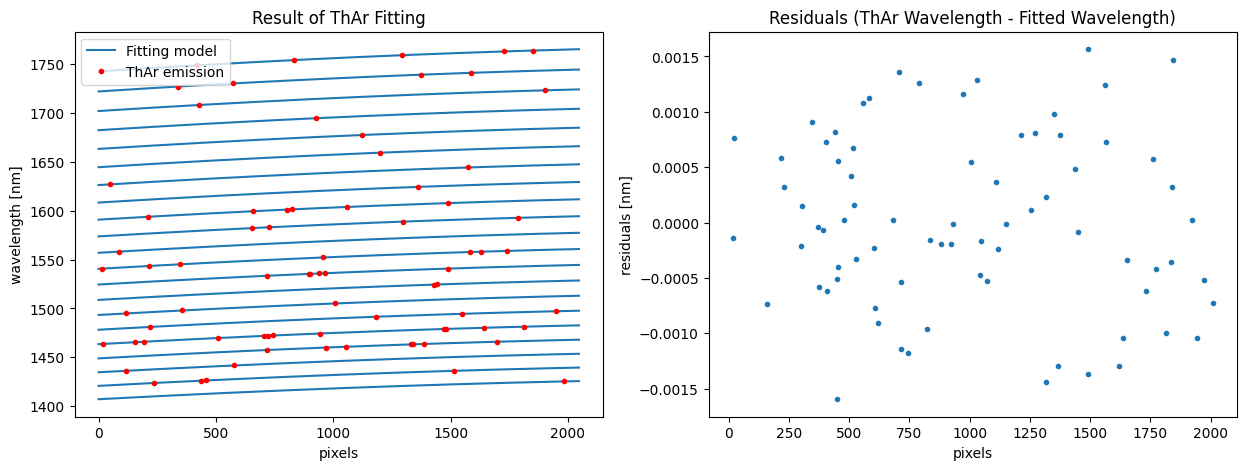

In [7]:
## THAR (ThAr-ThAr)
# Settings
if band=='h':
    rawtag='IRDAD000'
elif band=='y':
    rawtag='IRDBD000'
thar=irdstream.Stream2D("thar",datadir_thar,anadir,rawtag=rawtag,fitsid=fitsid_thar)
thar.trace = trace_mmf

# removing noise pattern
thar.clean_pattern(trace_mask=trace_mask,extin='', extout='_cp', hotpix_mask=hotpix_mask)

# wavelength calibration
thar.calibrate_wavelength()

.. _step1-4:

### Step 1-4: Creating a Normalized Flat

- This process similar to `hdsis_ecf <https://github.com/chimari/hds_iraf>`_ for HDS/Subaru data to reduce the fringe appearing in a spectrum.
- In the preparation of this process, we create the normalized flat by using `apnormalize`.
- After applying `flatten`, **'{stream_id}\_{band}\_{mmf}.fits'** (e.g., flat_star_h_m2.fits) is created in anadir, containing the extracted spectrum of flat data.

In [8]:
## FLAT
if mmf=='mmf2': # Star fiber -> FLAT_STAR
    # Settings
    flat_star=irdstream.Stream2D("flat_star",datadir_flat,anadir)
    flat_star.fitsid=fitsid_flat_star
    flat_star.trace = trace_mmf
    flat_star.band=band 
    if band == 'h' and flat_star.fitsid[0]%2==0:
        flat_star.fitsid_increment() 

    # Removing noise pattern
    flat_star.clean_pattern(trace_mask=trace_mask,extin='', extout='_cp', hotpix_mask=hotpix_mask)
    flat_star.imcomb = True # median combine

    # Extract 1D spectrum
    flat_star.flatten(hotpix_mask=hotpix_mask)

    # Flat spectrum normalized in each pixel within an aperture
    df_flatn = flat_star.apnormalize()

elif mmf=='mmf1': # Comb fiber -> FLAT_COMB
    flat_comb.trace = trace_mmf

    # Removing noise pattern
    flat_comb.clean_pattern(trace_mask=trace_mask,extin='', extout='_cp', hotpix_mask=hotpix_mask)
    flat_comb.imcomb = True # median combine

    # Extract 1D spectrum
    flat_comb.flatten(hotpix_mask=hotpix_mask)

    # Flat spectrum normalized in each pixel within an aperture
    df_flatn = flat_comb.apnormalize()

No fitsid yet.
clean_pattern: output extension=_cp


  0%|                                                                                                                          | 0/50 [00:00<?, ?it/s]

  2%|██▎                                                                                                               | 1/50 [00:00<00:48,  1.02it/s]

  4%|████▌                                                                                                             | 2/50 [00:02<00:52,  1.09s/it]

  6%|██████▊                                                                                                           | 3/50 [00:03<00:55,  1.18s/it]

  8%|█████████                                                                                                         | 4/50 [00:04<00:49,  1.08s/it]

 10%|███████████▍                                                                                                      | 5/50 [00:05<00:47,  1.05s/it]

 12%|█████████████▋                                                                                                    | 6/50 [00:06<00:43,  1.00it/s]

 14%|███████████████▉                                                                                                  | 7/50 [00:07<00:42,  1.02it/s]

 16%|██████████████████▏                                                                                               | 8/50 [00:08<00:42,  1.02s/it]

 18%|████████████████████▌                                                                                             | 9/50 [00:09<00:43,  1.06s/it]

 20%|██████████████████████▌                                                                                          | 10/50 [00:10<00:42,  1.07s/it]

 22%|████████████████████████▊                                                                                        | 11/50 [00:11<00:39,  1.01s/it]

 24%|███████████████████████████                                                                                      | 12/50 [00:12<00:37,  1.01it/s]

 26%|█████████████████████████████▍                                                                                   | 13/50 [00:13<00:36,  1.00it/s]

 28%|███████████████████████████████▋                                                                                 | 14/50 [00:14<00:37,  1.04s/it]

 30%|█████████████████████████████████▉                                                                               | 15/50 [00:15<00:37,  1.06s/it]

 32%|████████████████████████████████████▏                                                                            | 16/50 [00:16<00:37,  1.11s/it]

 34%|██████████████████████████████████████▍                                                                          | 17/50 [00:18<00:37,  1.14s/it]

 36%|████████████████████████████████████████▋                                                                        | 18/50 [00:19<00:35,  1.10s/it]

 38%|██████████████████████████████████████████▉                                                                      | 19/50 [00:20<00:32,  1.06s/it]

 40%|█████████████████████████████████████████████▏                                                                   | 20/50 [00:21<00:32,  1.07s/it]

 42%|███████████████████████████████████████████████▍                                                                 | 21/50 [00:22<00:32,  1.13s/it]

 44%|█████████████████████████████████████████████████▋                                                               | 22/50 [00:23<00:32,  1.16s/it]

 46%|███████████████████████████████████████████████████▉                                                             | 23/50 [00:24<00:31,  1.18s/it]

 48%|██████████████████████████████████████████████████████▏                                                          | 24/50 [00:26<00:31,  1.19s/it]

 50%|████████████████████████████████████████████████████████▌                                                        | 25/50 [00:27<00:28,  1.13s/it]

 52%|██████████████████████████████████████████████████████████▊                                                      | 26/50 [00:28<00:25,  1.08s/it]

 54%|█████████████████████████████████████████████████████████████                                                    | 27/50 [00:28<00:23,  1.03s/it]

 56%|███████████████████████████████████████████████████████████████▎                                                 | 28/50 [00:30<00:23,  1.06s/it]

 58%|█████████████████████████████████████████████████████████████████▌                                               | 29/50 [00:31<00:23,  1.10s/it]

 60%|███████████████████████████████████████████████████████████████████▊                                             | 30/50 [00:32<00:22,  1.13s/it]

 62%|██████████████████████████████████████████████████████████████████████                                           | 31/50 [00:33<00:21,  1.15s/it]

 64%|████████████████████████████████████████████████████████████████████████▎                                        | 32/50 [00:34<00:19,  1.11s/it]

 66%|██████████████████████████████████████████████████████████████████████████▌                                      | 33/50 [00:35<00:18,  1.11s/it]

 68%|████████████████████████████████████████████████████████████████████████████▊                                    | 34/50 [00:36<00:17,  1.06s/it]

 70%|███████████████████████████████████████████████████████████████████████████████                                  | 35/50 [00:37<00:16,  1.10s/it]

 72%|█████████████████████████████████████████████████████████████████████████████████▎                               | 36/50 [00:39<00:15,  1.12s/it]

 74%|███████████████████████████████████████████████████████████████████████████████████▌                             | 37/50 [00:40<00:14,  1.12s/it]

 76%|█████████████████████████████████████████████████████████████████████████████████████▉                           | 38/50 [00:41<00:13,  1.12s/it]

 78%|████████████████████████████████████████████████████████████████████████████████████████▏                        | 39/50 [00:42<00:11,  1.05s/it]

 80%|██████████████████████████████████████████████████████████████████████████████████████████▍                      | 40/50 [00:43<00:10,  1.00s/it]

 82%|████████████████████████████████████████████████████████████████████████████████████████████▋                    | 41/50 [00:43<00:08,  1.03it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████▉                  | 42/50 [00:45<00:08,  1.02s/it]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████▏               | 43/50 [00:46<00:07,  1.05s/it]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▍             | 44/50 [00:47<00:06,  1.07s/it]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 45/50 [00:48<00:05,  1.09s/it]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 46/50 [00:49<00:04,  1.06s/it]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 47/50 [00:50<00:03,  1.01s/it]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 48/50 [00:51<00:01,  1.03it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 49/50 [00:52<00:01,  1.00s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:53<00:00,  1.04s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:53<00:00,  1.07s/it]

  0%|                                                                                                                           | 0/1 [00:00<?, ?it/s]

median combine:  _cp


  0%|                                                                                                                          | 0/50 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 654.18it/s]

  0%|                                                                                                                          | 0/21 [00:00<?, ?it/s]

 38%|███████████████████████████████████████████▍                                                                      | 8/21 [00:00<00:00, 70.63it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████                           | 16/21 [00:00<00:00, 67.43it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 66.97it/s]

  0%|                                                                                                                          | 0/21 [00:00<?, ?it/s]

 38%|███████████████████████████████████████████▍                                                                      | 8/21 [00:00<00:00, 71.10it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████                           | 16/21 [00:00<00:00, 67.33it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 67.10it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:18<00:00, 18.19s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:18<00:00, 18.19s/it]

flatten (+ hotpix mask): output extension=_hp_m2
continuum is fitted with order_fit = 23.
median combine:  _cp


  0%|                                                                                                                          | 0/50 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 710.76it/s]

  0%|                                                                                                                          | 0/21 [00:00<?, ?it/s]

 10%|██████████▊                                                                                                       | 2/21 [00:00<00:03,  5.81it/s]

 14%|████████████████▎                                                                                                 | 3/21 [00:00<00:03,  4.91it/s]

 19%|█████████████████████▋                                                                                            | 4/21 [00:00<00:03,  4.54it/s]

 24%|███████████████████████████▏                                                                                      | 5/21 [00:01<00:03,  4.34it/s]

 29%|████████████████████████████████▌                                                                                 | 6/21 [00:01<00:03,  4.24it/s]

 33%|██████████████████████████████████████                                                                            | 7/21 [00:01<00:03,  4.17it/s]

 38%|███████████████████████████████████████████▍                                                                      | 8/21 [00:01<00:03,  4.12it/s]

 43%|████████████████████████████████████████████████▊                                                                 | 9/21 [00:02<00:02,  4.09it/s]

 48%|█████████████████████████████████████████████████████▊                                                           | 10/21 [00:02<00:02,  4.07it/s]

 52%|███████████████████████████████████████████████████████████▏                                                     | 11/21 [00:02<00:02,  4.03it/s]

 57%|████████████████████████████████████████████████████████████████▌                                                | 12/21 [00:02<00:02,  4.02it/s]

 62%|█████████████████████████████████████████████████████████████████████▉                                           | 13/21 [00:03<00:01,  4.01it/s]

 67%|███████████████████████████████████████████████████████████████████████████▎                                     | 14/21 [00:03<00:01,  4.01it/s]

 71%|████████████████████████████████████████████████████████████████████████████████▋                                | 15/21 [00:03<00:01,  4.01it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████                           | 16/21 [00:03<00:01,  4.01it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████▍                     | 17/21 [00:04<00:00,  4.02it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████▊                | 18/21 [00:04<00:00,  4.03it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 19/21 [00:04<00:00,  4.01it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 20/21 [00:04<00:00,  4.01it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:05<00:00,  4.01it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:05<00:00,  4.14it/s]

.. _step2:

## Step 2: Extracting the Target 1D Spectrum

From here, we will extract target spectrum.

<img src="../figures/reduc_flowchart_target.png" width=80%>

In [9]:
#--------FOR TARGET--------#
# Settings
target = irdstream.Stream2D('targets', datadir_target, anadir, fitsid=fitsid_target)
if band=='h' and target.fitsid[0]%2==0:
    target.fitsid_increment() # when you use H-band
target.info = True  # show detailed info
target.trace = trace_mmf

fitsid: [41510]


.. _step2-1:

### Step 2-1: Removing Noise Pattern on the Detector

In [10]:
target.clean_pattern(trace_mask=trace_mask, extin='', extout='_cp', hotpix_mask=hotpix_mask)

clean_pattern: output extension=_cp


  0%|                                                                                                                           | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.14it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]

.. _step2-2:

### Step 2-2: Aperture Extraction & Flat Fielding

- The ``apext_flatfield`` function extracts each order while applying flat fielding.
- This process requires the flat spectrum normalized in each pixel within an aperture (i.e., df_flatn).
- After this process, **'IRDA000..._flnhp.fits'** (when `hotpix_mask` is set) or **'IRDA000..._fln.fits'** (when `hotpix_mask = None`) is created.

In [11]:
target.apext_flatfield(df_flatn, hotpix_mask=hotpix_mask)

  0%|                                                                                                                           | 0/1 [00:00<?, ?it/s]

  0%|                                                                                                                          | 0/21 [00:00<?, ?it/s]

  5%|█████▍                                                                                                            | 1/21 [00:00<00:02,  9.62it/s]

 10%|██████████▊                                                                                                       | 2/21 [00:00<00:03,  5.24it/s]

 14%|████████████████▎                                                                                                 | 3/21 [00:00<00:03,  4.58it/s]

 19%|█████████████████████▋                                                                                            | 4/21 [00:00<00:03,  4.33it/s]

 24%|███████████████████████████▏                                                                                      | 5/21 [00:01<00:03,  4.19it/s]

 29%|████████████████████████████████▌                                                                                 | 6/21 [00:01<00:03,  4.11it/s]

 33%|██████████████████████████████████████                                                                            | 7/21 [00:01<00:03,  4.08it/s]

 38%|███████████████████████████████████████████▍                                                                      | 8/21 [00:01<00:03,  4.05it/s]

 43%|████████████████████████████████████████████████▊                                                                 | 9/21 [00:02<00:02,  4.04it/s]

 48%|█████████████████████████████████████████████████████▊                                                           | 10/21 [00:02<00:02,  4.03it/s]

 52%|███████████████████████████████████████████████████████████▏                                                     | 11/21 [00:02<00:02,  4.03it/s]

 57%|████████████████████████████████████████████████████████████████▌                                                | 12/21 [00:02<00:02,  4.02it/s]

 62%|█████████████████████████████████████████████████████████████████████▉                                           | 13/21 [00:03<00:01,  4.01it/s]

 67%|███████████████████████████████████████████████████████████████████████████▎                                     | 14/21 [00:03<00:01,  4.01it/s]

 71%|████████████████████████████████████████████████████████████████████████████████▋                                | 15/21 [00:03<00:01,  4.01it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████                           | 16/21 [00:03<00:01,  4.01it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████▍                     | 17/21 [00:04<00:01,  4.00it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████▊                | 18/21 [00:04<00:00,  4.00it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 19/21 [00:04<00:00,  4.00it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 20/21 [00:04<00:00,  4.00it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:05<00:00,  4.00it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:05<00:00,  4.11it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.21s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.21s/it]

pixel = -2, Mean = 0.84719
pixel = -1, Mean = 1.35781
pixel = 0, Mean = 1.46712
pixel = 1, Mean = 1.34045
pixel = 2, Mean = 0.77174
pixel = 3, Mean = 0.17889


.. _step2-3:

### Step 2-3: Assigning Wavelength to the Extracted Spectrum

- The `dispcor` function assigns wavelength solution to the extracted spectrum.
- Please change the ``extin`` option to ``extin='_flnhp'`` or ``extin='_fln'`` depending on the previous process.
- After this process, **'w..._m?.dat'** is created, with data format: `$1: Wavelength [nm]`, `$2: Order`, `$3: Counts`.

dispcor: output spectrum= w41511_m2.dat


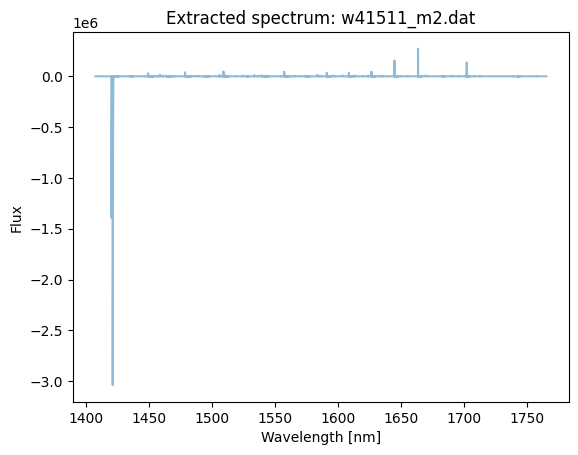

In [12]:
target.dispcor(master_path=thar.anadir,extin='_flnhp')

.. _step2-4:

### Step 2-4: Creating the Blaze Function

- The blaze function is created from FLAT spectrum to ''normalize'' the spectra.
- After this process, **'wblaze_{band}_{mmf}.dat'** is created.

  0%|                                                                                                                           | 0/1 [00:00<?, ?it/s]

median combine:  _cp


  0%|                                                                                                                          | 0/50 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 608.52it/s]

  0%|                                                                                                                          | 0/21 [00:00<?, ?it/s]

  5%|█████▍                                                                                                            | 1/21 [00:00<00:02,  9.99it/s]

 10%|██████████▊                                                                                                       | 2/21 [00:00<00:03,  5.33it/s]

 14%|████████████████▎                                                                                                 | 3/21 [00:00<00:03,  4.63it/s]

 19%|█████████████████████▋                                                                                            | 4/21 [00:00<00:03,  4.36it/s]

 24%|███████████████████████████▏                                                                                      | 5/21 [00:01<00:03,  4.23it/s]

 29%|████████████████████████████████▌                                                                                 | 6/21 [00:01<00:03,  4.16it/s]

 33%|██████████████████████████████████████                                                                            | 7/21 [00:01<00:03,  4.11it/s]

 38%|███████████████████████████████████████████▍                                                                      | 8/21 [00:01<00:03,  4.07it/s]

 43%|████████████████████████████████████████████████▊                                                                 | 9/21 [00:02<00:02,  4.04it/s]

 48%|█████████████████████████████████████████████████████▊                                                           | 10/21 [00:02<00:02,  3.97it/s]

 52%|███████████████████████████████████████████████████████████▏                                                     | 11/21 [00:02<00:02,  3.91it/s]

 57%|████████████████████████████████████████████████████████████████▌                                                | 12/21 [00:02<00:02,  3.90it/s]

 62%|█████████████████████████████████████████████████████████████████████▉                                           | 13/21 [00:03<00:02,  3.91it/s]

 67%|███████████████████████████████████████████████████████████████████████████▎                                     | 14/21 [00:03<00:01,  3.92it/s]

 71%|████████████████████████████████████████████████████████████████████████████████▋                                | 15/21 [00:03<00:01,  3.93it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████                           | 16/21 [00:03<00:01,  3.95it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████▍                     | 17/21 [00:04<00:01,  3.96it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████▊                | 18/21 [00:04<00:00,  3.98it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 19/21 [00:04<00:00,  3.99it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 20/21 [00:04<00:00,  4.00it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:05<00:00,  4.01it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:05<00:00,  4.09it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:23<00:00, 23.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:23<00:00, 23.57s/it]

pixel = -2, Mean = 0.84719
pixel = -1, Mean = 1.35781
pixel = 0, Mean = 1.46712
pixel = 1, Mean = 1.34045
pixel = 2, Mean = 0.77174
pixel = 3, Mean = 0.17889


dispcor: output spectrum= wblaze_h_m2.dat


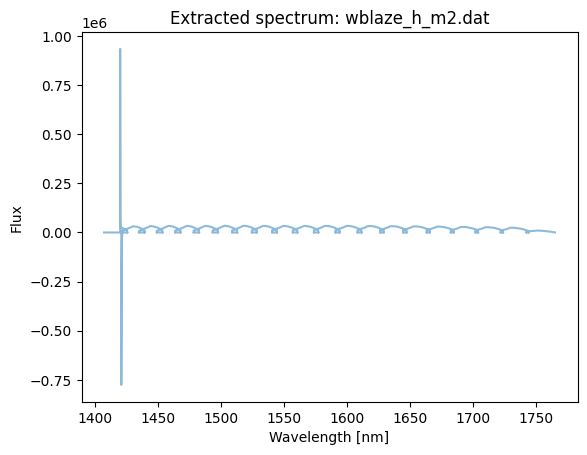

In [13]:
# blaze function
if mmf=='mmf2':
    flat_star.apext_flatfield(df_flatn,hotpix_mask=hotpix_mask)
    flat_star.dispcor(master_path=thar.anadir)
elif mmf=='mmf1':
    flat_comb.apext_flatfield(df_flatn,hotpix_mask=hotpix_mask)
    flat_comb.dispcor(master_path=thar.anadir)

.. _step2-5:

### Step 2-5: Normalizing the Spectra

- Normalize the target spectrum by dividing it by the blaze function.
- After `normalize1D`, the normalized spectrum (**nw..._m?.dat**) and the order-combined spectrum (**ncw..._m?.dat**) are created.
    - Data formats are: 
        - Normalized (**nw**): `$1: Wavelength [nm]`, `$2: Order`, `$3: Counts`, `$4: S/N`, `$5: Uncertainties`
        - Order-combined (**ncw**): `$1: Wavelength [nm]`, `$2: Counts`, `$3: S/N`, `$4: Uncertainties`
- For the order-combined spectra: There are overlapping wavelengths at the edges of orders, so we "normalize" by summing up the flux in these regions to improve the signal-to-noise ratio.

Using default readout Noise : 12
readout noise of IRD detectors: ~12e- (10min exposure)


normalize1D: output normalized 1D spectrum= nw41511_m2.dat


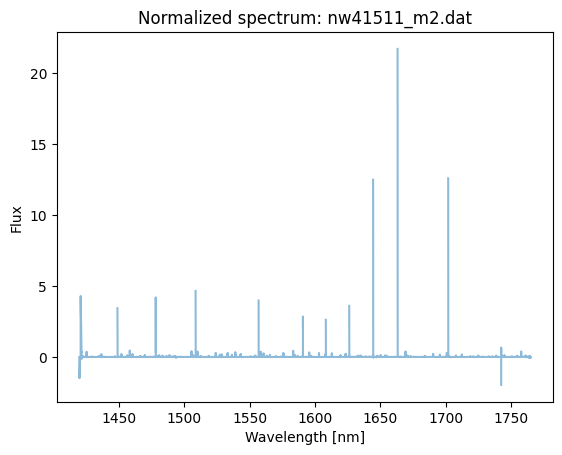

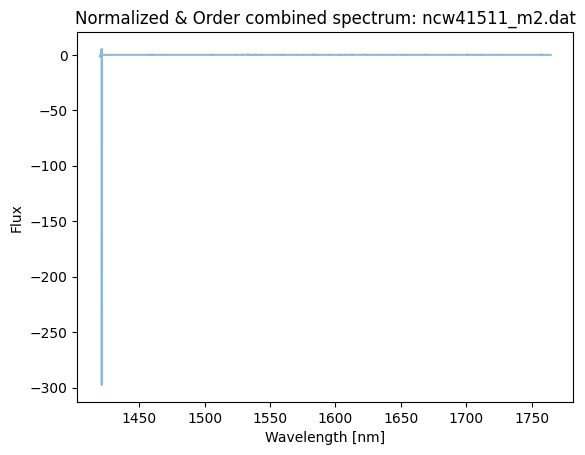

In [14]:
# combine & normalize
if mmf=='mmf2':
    target.normalize1D(master_path=flat_star.anadir,readout_noise_mode=readout_noise_mode)
elif mmf=='mmf1':
    target.normalize1D(master_path=flat_comb.anadir,readout_noise_mode=readout_noise_mode)

This concludes the data reduction process!